<h1>Decision Tree model for the PhishingVsBenignURL data set</h1>

In [1]:
import pandas as pd 
import numpy as np 
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
import graphviz
warnings.filterwarnings("ignore")

In [2]:
#Reading the csv and making a dataframe from the data
pvb = pd.read_csv(r"C:\Users\myste\Documents\MSCS\Fall 2020\ML\DataSetForPhishingVSBenignUrl.csv")

In [3]:
pvb.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


<h2>Encoding the values of Phishing vs Non phishing to use as target variables</h2>

In [4]:
conditions = [(pvb['URL_Type_obf_Type'] == 'phishing'), (pvb['URL_Type_obf_Type'] != 'phishing')]
# create a list of the values we want to assign for each condition
values = [0,1]
# create a new column and use np.select to assign values to it using our lists as arguments
pvb['obf_Type'] = np.select(conditions, values)
# display updated DataFrame
pvb.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type,obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement,1
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement,1
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement,1
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement,1
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement,1


In [5]:
pvb=pvb.drop(columns='URL_Type_obf_Type')

<h2>Replacing the values of NaN and Infinity with 0</h2>

In [6]:
#pvb=pvb.replace(np.nan, 0.0)
#pvb=pvb.replace(np.inf, 0.0)

In [7]:
pvb.replace([np.inf, -np.inf], np.nan)
pvb.dropna(inplace=True)

In [8]:
pvb

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,obf_Type
35,0,4,4,6.250000,17,3.750000,4,4,2,0,...,1,0,-1,0.726945,0.768811,0.916667,1.000000,1.000000,-1.000000,1
37,22,4,10,6.250000,17,3.500000,4,19,10,0,...,9,8,7,0.686486,0.768811,0.916667,0.748105,0.757206,0.749167,1
38,23,4,10,6.250000,17,3.500000,4,19,10,0,...,9,8,7,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268,1
39,22,4,10,6.250000,17,3.500000,4,19,10,0,...,9,8,7,0.683476,0.768811,0.916667,0.742090,0.750292,0.741506,1
40,23,4,10,6.250000,17,3.500000,4,19,10,0,...,9,8,7,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,1
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,1
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,1
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,1


<h2>Spltting data into target variable and features</h2>

In [9]:
#Putting encoded 'URL_Type_obf_Type' as the target output and all the other columns as features for training in X
y = pvb[['obf_Type']] 
X = pvb.drop(['obf_Type', ], axis = 1)
print(y.shape, X.shape)
X

(18982, 1) (18982, 79)


,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath
35,0,4,4,6.250000,17,3.750000,4,4,2,0,...,1,1,0,-1,0.726945,0.768811,0.916667,1.000000,1.000000,-1.000000
37,22,4,10,6.250000,17,3.500000,4,19,10,0,...,1,9,8,7,0.686486,0.768811,0.916667,0.748105,0.757206,0.749167
38,23,4,10,6.250000,17,3.500000,4,19,10,0,...,1,9,8,7,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268
39,22,4,10,6.250000,17,3.500000,4,19,10,0,...,1,9,8,7,0.683476,0.768811,0.916667,0.742090,0.750292,0.741506
40,23,4,10,6.250000,17,3.500000,4,19,10,0,...,1,9,8,7,0.687286,0.768811,0.916667,0.747622,0.756298,0.748268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,...,11,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,...,2,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,...,14,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,...,1,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772


<h2>Scaling the feature data</h2>

In [10]:
#Not Scaling the values because we dont need to scale values for decision trees
#scaled = MinMaxScaler() 
#X = scaled.fit_transform(X) 

<h2>Splitting into test and train data</h2>

In [11]:
#Splitting the data into testing and training using a randomly generated random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = np.random)
y_test=y_test.astype('int')
y_train=y_train.astype('int')
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(15185, 79) (15185, 1)
(3797, 79) (3797, 1)


<h1>Gini Impurity</h1>

<h2> Max depth = 1</h2>

In [12]:
gd1 = DecisionTreeClassifier(criterion = "gini",random_state = 50, max_depth=1, min_samples_leaf=5)
gd1.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gd1.predict(X_test), y_test))

Accuracy: 0.8375032920726889


<h2> Max depth = 2</h2>

In [13]:
gd2 = DecisionTreeClassifier(criterion = "gini",random_state = 50, max_depth=2, min_samples_leaf=5)
gd2.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gd2.predict(X_test), y_test))

Accuracy: 0.8572557282064788


<h2> Max depth = 3</h2>

In [14]:
gd3 = DecisionTreeClassifier(criterion = "gini",random_state = 50, max_depth=3, min_samples_leaf=5)
gd3.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gd3.predict(X_test), y_test))

Accuracy: 0.8656834342902291


<h2> Max depth = 4</h2>

In [15]:
gd4 = DecisionTreeClassifier(criterion = "gini",random_state = 50, max_depth=4, min_samples_leaf=5)
gd4.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gd4.predict(X_test), y_test))

Accuracy: 0.8888596260205426


<h2> Max depth = 5</h2>

In [16]:
gd5 = DecisionTreeClassifier(criterion = "gini",random_state = 50,max_depth=5, min_samples_leaf=5)
gd5.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gd5.predict(X_test), y_test))

Accuracy: 0.8914932841717145


<h2> Max depth = 6</h2>

In [17]:
gd6 = DecisionTreeClassifier(criterion = "gini",random_state = 50,max_depth=6, min_samples_leaf=5)
gd6.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(gd6.predict(X_test), y_test))

Accuracy: 0.9033447458519884


<h1> Entropy Impurity</h1>

<h2> Max depth = 1</h2>

In [18]:
ed1 = DecisionTreeClassifier(criterion = "entropy", max_depth=1, min_samples_leaf=5)
ed1.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ed1.predict(X_test), y_test))

Accuracy: 0.7911509086120622


<h2> Max depth = 2</h2>

In [19]:
ed2 = DecisionTreeClassifier(criterion = "entropy", max_depth=2, min_samples_leaf=5)
ed2.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ed2.predict(X_test), y_test))

Accuracy: 0.8430339741901501


<h2> Max depth = 3</h2>

In [20]:
ed3 = DecisionTreeClassifier(criterion = "entropy", max_depth=3, min_samples_leaf=5)
ed3.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ed3.predict(X_test), y_test))

Accuracy: 0.8419805109296813


<h2> Max depth = 4</h2>

In [21]:
ed4 = DecisionTreeClassifier(criterion = "entropy", max_depth=4, min_samples_leaf=5)
ed4.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ed4.predict(X_test), y_test))

Accuracy: 0.8656834342902291


<h2> Max depth = 5</h2>

In [22]:
ed5 = DecisionTreeClassifier(criterion = "entropy", max_depth=5, min_samples_leaf=5)
ed5.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ed5.predict(X_test), y_test))

Accuracy: 0.9009744535159336


<h2> Max depth = 6</h2>

In [23]:
ed6 = DecisionTreeClassifier(criterion = "entropy", max_depth=6, min_samples_leaf=5)
ed6.fit(X_train, y_train)
print("Accuracy:", metrics.accuracy_score(ed6.predict(X_test), y_test))

Accuracy: 0.9062417698182776


<h1> Results from above: </h1>

In [24]:
results = {'Depth': [1,2,3,4,5,6],
        'Accuracy_Gini': [0.785,0.843,0.874,0.891, 0.897,0.912],
        'Accuracy_Entropy': [0.785,0.843,0.874,0.874,0.895,0.906]
          }
df = pd.DataFrame(results, columns = ['Depth', 'Accuracy_Gini', 'Accuracy_Entropy'])
df

,Depth,Accuracy_Gini,Accuracy_Entropy
0,1,0.785,0.785
1,2,0.843,0.843
2,3,0.874,0.874
3,4,0.891,0.874
4,5,0.897,0.895
5,6,0.912,0.906


<h3> 1. The value of accuracy for gini impurity and entropy imprity are same upto 3 depth levels.</h3>
<h3> 2. The accuracy for gini becomes more than entropy after depth 3.</h3>
<h3> 3. As the depth increases the trees become more prone to overfitting.</h3>

<h1> Visualizing the entropy tree and dicussing results:</h1>

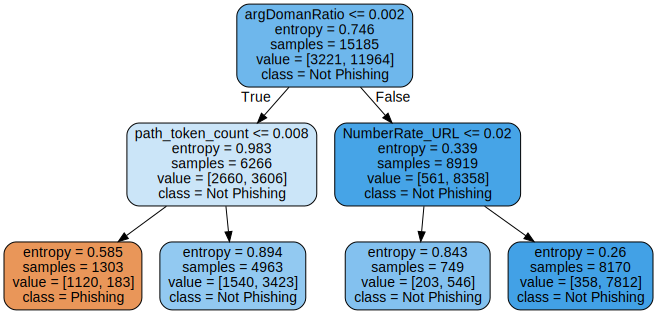

In [25]:
# Visualizing the Gini Index based Decision Tree
feature_names = pvb.columns[:79]
class_names = ["Phishing", "Not Phishing"]
graph_data = tree.export_graphviz(ed2, out_file=None, filled=True, rounded=True,
                                feature_names=feature_names,  
                                class_names=class_names)
graph = graphviz.Source(graph_data)  
graph

<h1>Discussions on results:</h1>
<h3> For both the trees we calculate impurity of the target. The dataset is then split on the different attributes. The impurity for each branch is calculated. Then it is added proportionally, to get total impurity for the split. The resulting impurity is subtracted from the imprity before the split. The result is the Information Gain. Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch. This ultimately gives us a decision tree that is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values. 
The benefits of this are that it takes less time to compute and that it can deal with irrelevant features as well. This method also gives a detailed analysis with the only problem being that decision trees are prone to overfitting.</h3>
